### Importação dos dados



In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [55]:
pip install pandas matplotlib seaborn

Testes

#1. Análise do faturamento


In [56]:
total_faturamento_loja1 = loja['Preço'].sum()
print(f"O faturamento total da loja 1 foi: R$ {total_faturamento_loja1:,.2f}")

total_faturamento_loja2 = loja2['Preço'].sum()
print(f"O faturamento total da loja 2 foi: R$ {total_faturamento_loja2:,.2f}")

total_faturamento_loja3 = loja3['Preço'].sum()
print(f"O faturamento total da loja 3 foi: R$ {total_faturamento_loja3:,.2f}")

total_faturamento_loja4 = loja4['Preço'].sum()
print(f"O faturamento total da loja 4 foi: R$ {total_faturamento_loja4:,.2f}")

faturamento_total_geral = total_faturamento_loja1 + total_faturamento_loja2 + total_faturamento_loja3 + total_faturamento_loja4
print(f"\nO faturamento total geral das 4 lojas foi: R$ {faturamento_total_geral:,.2f}")

O faturamento total da loja 1 foi: R$ 1,534,509.12
O faturamento total da loja 2 foi: R$ 1,488,459.06
O faturamento total da loja 3 foi: R$ 1,464,025.03
O faturamento total da loja 4 foi: R$ 1,384,497.58

O faturamento total geral das 4 lojas foi: R$ 5,871,490.79


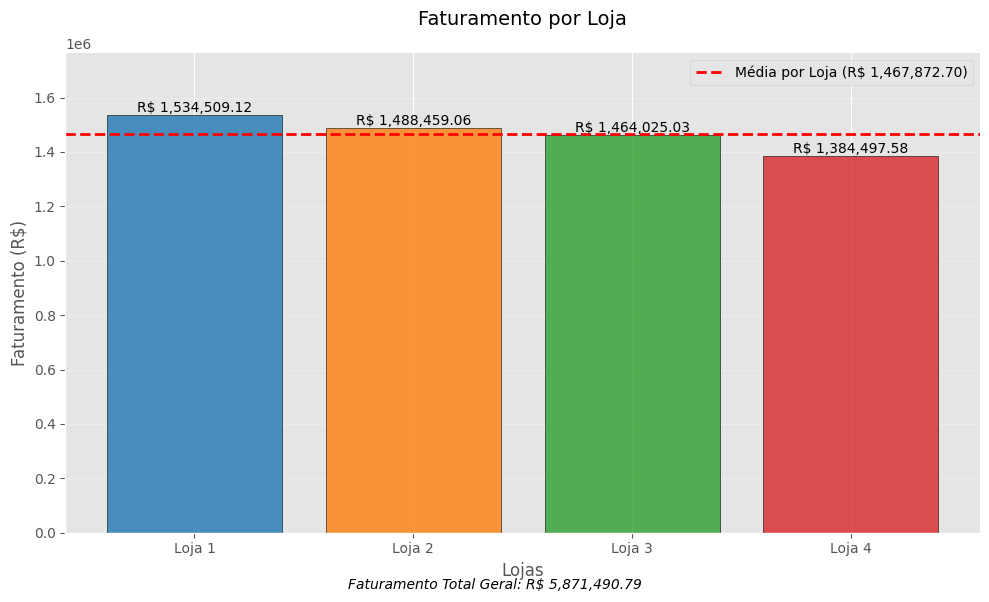

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Dados calculados (certifique-se que estas variáveis existem)
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [total_faturamento_loja1, total_faturamento_loja2,
                total_faturamento_loja3, total_faturamento_loja4]
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Configurações do gráfico - usando estilo disponível
available_styles = plt.style.available
if 'ggplot' in available_styles:
    plt.style.use('ggplot')  # estilo alternativo
else:
    # Configurações manuais caso não tenha ggplot
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['axes.grid'] = True

plt.figure(figsize=(10, 6))

# Gráfico de barras
bars = plt.bar(lojas, faturamentos, color=cores, edgecolor='black', alpha=0.8)

# Linha da média geral
media_geral = sum(faturamentos) / len(faturamentos)
plt.axhline(y=media_geral, color='red', linestyle='--', linewidth=2,
            label=f'Média por Loja (R$ {media_geral:,.2f})')

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {height:,.2f}',
             ha='center', va='bottom', fontsize=10)

# Configurações adicionais
plt.title('Faturamento por Loja', fontsize=14, pad=20)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)

# Ajustando eixo Y
plt.ylim(0, max(faturamentos) * 1.15)

# Rodapé informativo
plt.figtext(0.5, 0.01,
            f'Faturamento Total Geral: R$ {sum(faturamentos):,.2f}',
            ha='center', fontsize=10, style='italic')

# Removendo bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

O comércio com o maior valor de vendas é a loja 1, já loja 4 com valor menor que as demais.

# 2. Vendas por Categoria


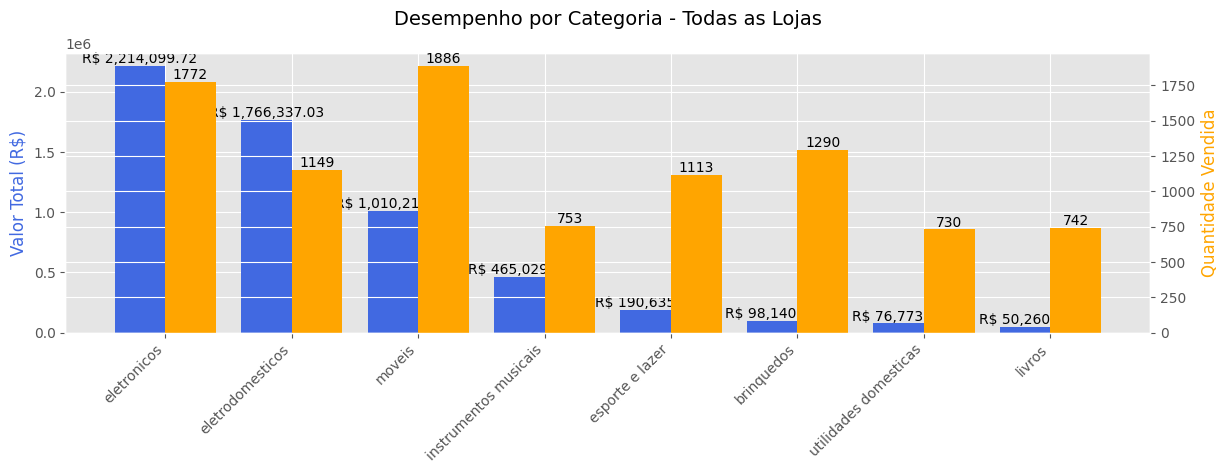

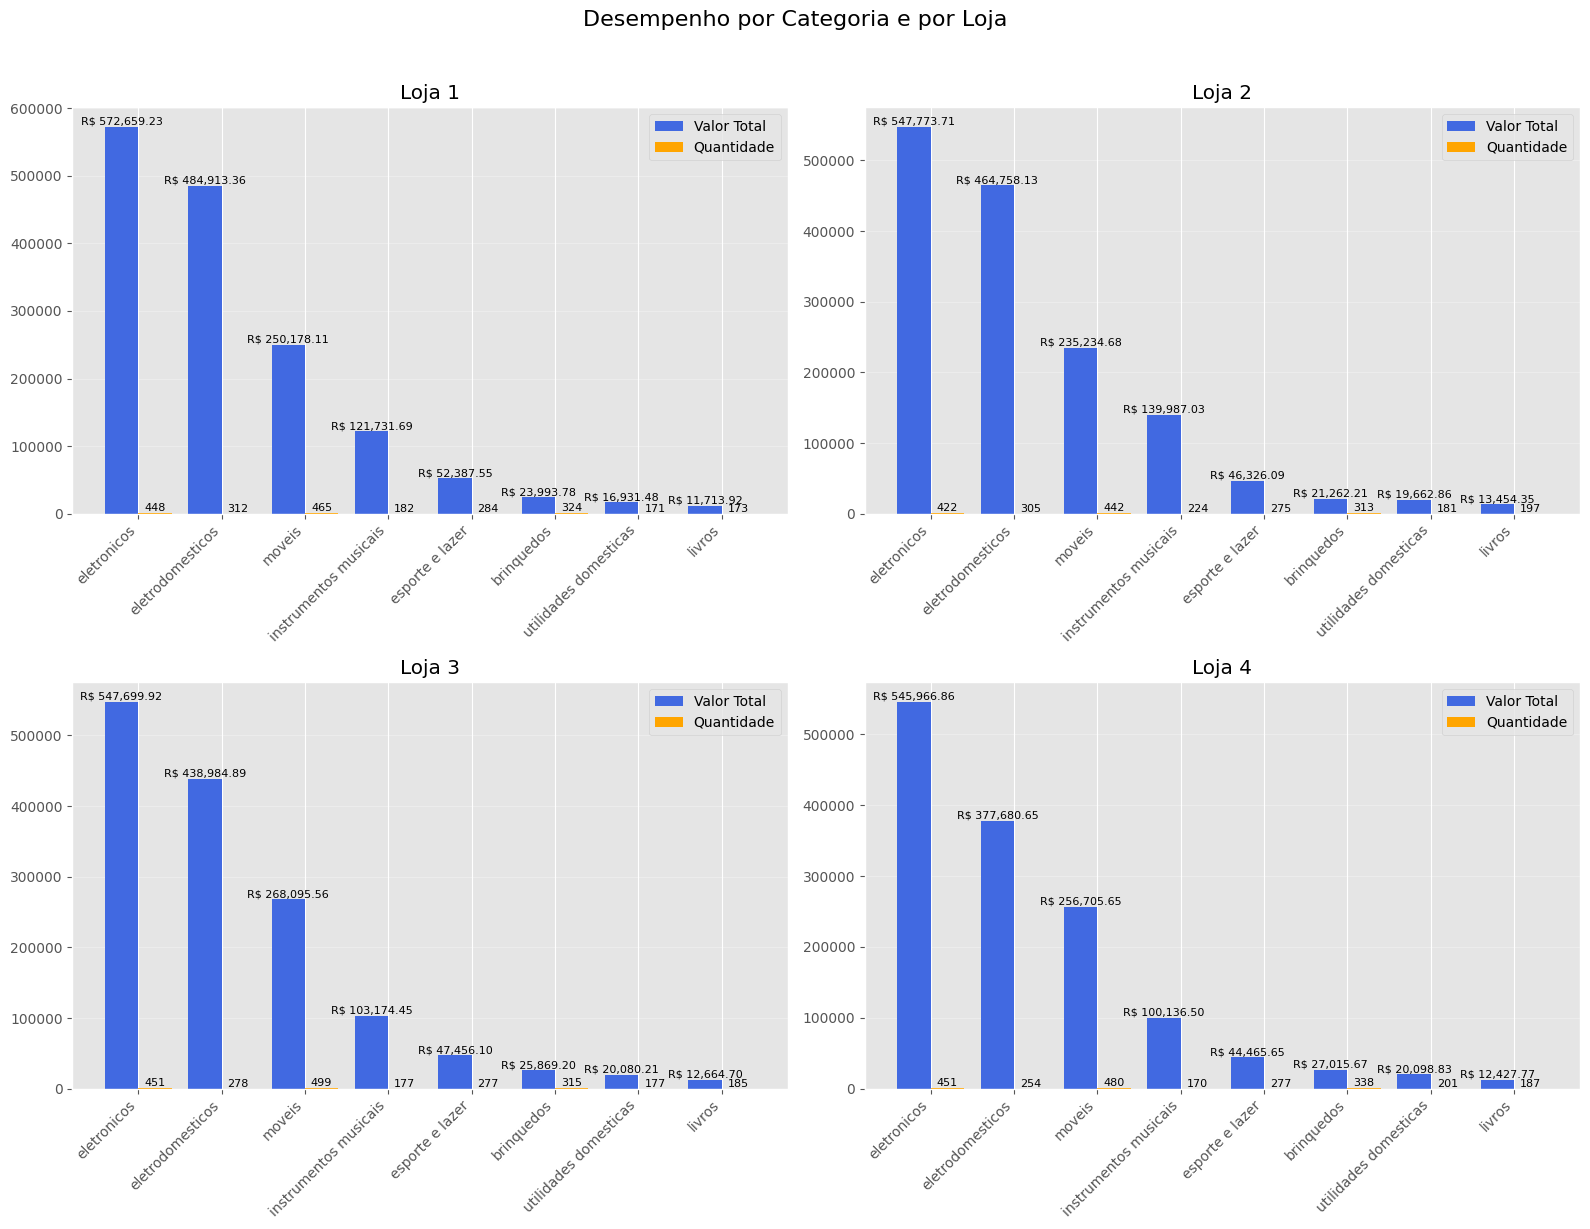

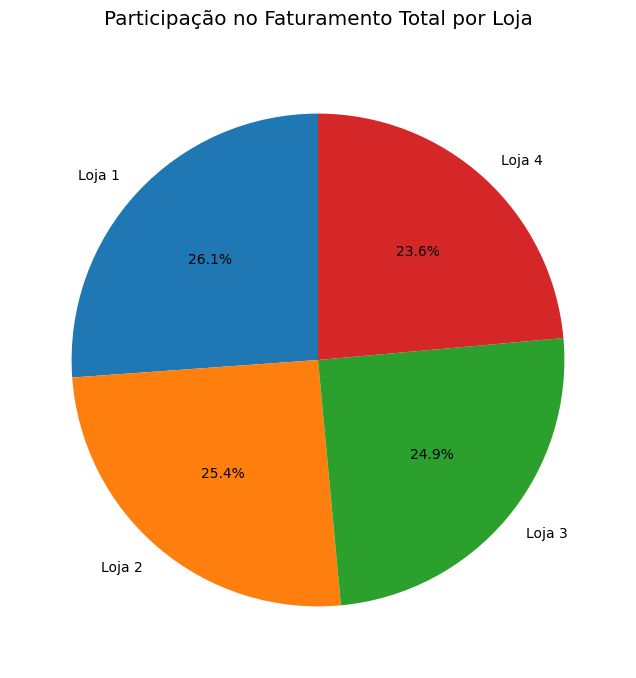

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações de estilo
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))

# 1. Gráfico para todas as lojas combinadas
categorias = categorias_geral.index
x = np.arange(len(categorias))

# Barras para valor total
ax1 = plt.subplot(2, 1, 1)
bars1 = ax1.bar(x - 0.2, categorias_geral['Valor_Total'], width=0.4,
                color='royalblue', label='Valor Total (R$)')

# Barras para quantidade (em eixo secundário)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + 0.2, categorias_geral['Quantidade'], width=0.4,
                color='orange', label='Quantidade')

# Configurações do primeiro gráfico
ax1.set_title('Desempenho por Categoria - Todas as Lojas', fontsize=14, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(categorias, rotation=45, ha='right')
ax1.set_ylabel('Valor Total (R$)', color='royalblue')
ax2.set_ylabel('Quantidade Vendida', color='orange')

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {height:,.2f}',
             ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# 2. Gráficos individuais por loja
fig2, axes = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Desempenho por Categoria e por Loja', fontsize=16, y=1.02)

for ax, (nome_loja, df_loja) in zip(axes.flatten(), lojas.items()):
    categorias_loja = df_loja.groupby('Categoria do Produto').agg(
        Valor_Total=('Preço', 'sum'),
        Quantidade=('Produto', 'count')
    ).sort_values('Valor_Total', ascending=False)

    x = np.arange(len(categorias_loja))

    # Barras para valor total
    bars_v = ax.bar(x - 0.2, categorias_loja['Valor_Total'], width=0.4,
                    color='royalblue', label='Valor Total')

    # Barras para quantidade
    bars_q = ax.bar(x + 0.2, categorias_loja['Quantidade'], width=0.4,
                    color='orange', label='Quantidade')

    # Configurações
    ax.set_title(nome_loja)
    ax.set_xticks(x)
    ax.set_xticklabels(categorias_loja.index, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)

    # Adicionar valores
    for bar in bars_v:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'R$ {height:,.2f}',
                ha='center', va='bottom', fontsize=8)

    for bar in bars_q:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

    ax.legend()

plt.tight_layout()
plt.show()

# 3. Gráfico de pizza para participação por loja
participacao_lojas = {nome: df['Preço'].sum() for nome, df in lojas.items()}

plt.figure(figsize=(8, 8))
plt.pie(participacao_lojas.values(), labels=participacao_lojas.keys(),
        autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Participação no Faturamento Total por Loja', pad=20)
plt.show()

As lojas 1, 2 e 3 tiveram o melhor faturamento e entre as duas categorias. O melhor desempenho da loja 4 só foi melhor na utilidade doméstica, porém não atingiu nas demais categorias.


# 3. Média de Avaliação das Lojas

In [59]:
# prompt: Gerar código com a média das avaliações das lojas

# Calculate the average rating for each store
media_avaliacoes_loja1 = loja['Avaliação da compra'].mean()
media_avaliacoes_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacoes_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacoes_loja4 = loja4['Avaliação da compra'].mean()

print(f"Média de avaliação da loja 1: {media_avaliacoes_loja1:.2f}")
print(f"Média de avaliação da loja 2: {media_avaliacoes_loja2:.2f}")
print(f"Média de avaliação da loja 3: {media_avaliacoes_loja3:.2f}")
print(f"Média de avaliação da loja 4: {media_avaliacoes_loja4:.2f}")

# Calculate the overall average rating across all stores
media_avaliacoes_total = todas_lojas['Avaliação da compra'].mean()
print(f"\nMédia de avaliação geral das 4 lojas: {media_avaliacoes_total:.2f}")

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00

Média de avaliação geral das 4 lojas: 4.01


A loja melhor avalida é da 2 e 3.

# 4. Produtos Mais e Menos Vendidos

════════════════════════════════════════════════════════════
    ANÁLISE COMPARATIVA: PRODUTOS MAIS E MENOS VENDIDOS     
════════════════════════════════════════════════════════════

TOP 5 PRODUTOS MENOS VENDIDOS:

1. Celular ABXY
   Loja 1: 33 unidades
   Loja 2: 41 unidades
   Loja 3: 44 unidades
   Loja 4: 39 unidades
   → Loja com menor desempenho: Loja 1 (33 unidades)

2. Headset
   Loja 1: 33 unidades
   Loja 2: 44 unidades
   Loja 3: 39 unidades
   Loja 4: 42 unidades
   → Loja com menor desempenho: Loja 1 (33 unidades)

3. Mochila
   Loja 1: 39 unidades
   Loja 2: 45 unidades
   Loja 3: 36 unidades
   Loja 4: 43 unidades
   → Loja com menor desempenho: Loja 3 (36 unidades)

4. Guitarra
   Loja 1: 47 unidades
   Loja 2: 47 unidades
   Loja 3: 38 unidades
   Loja 4: 33 unidades
   → Loja com menor desempenho: Loja 4 (33 unidades)

5. Ciência de dados com python
   Loja 1: 39 unidades
   Loja 2: 43 unidades
   Loja 3: 46 unidades
   Loja 4: 38 unidades
   → Loja com menor desempe

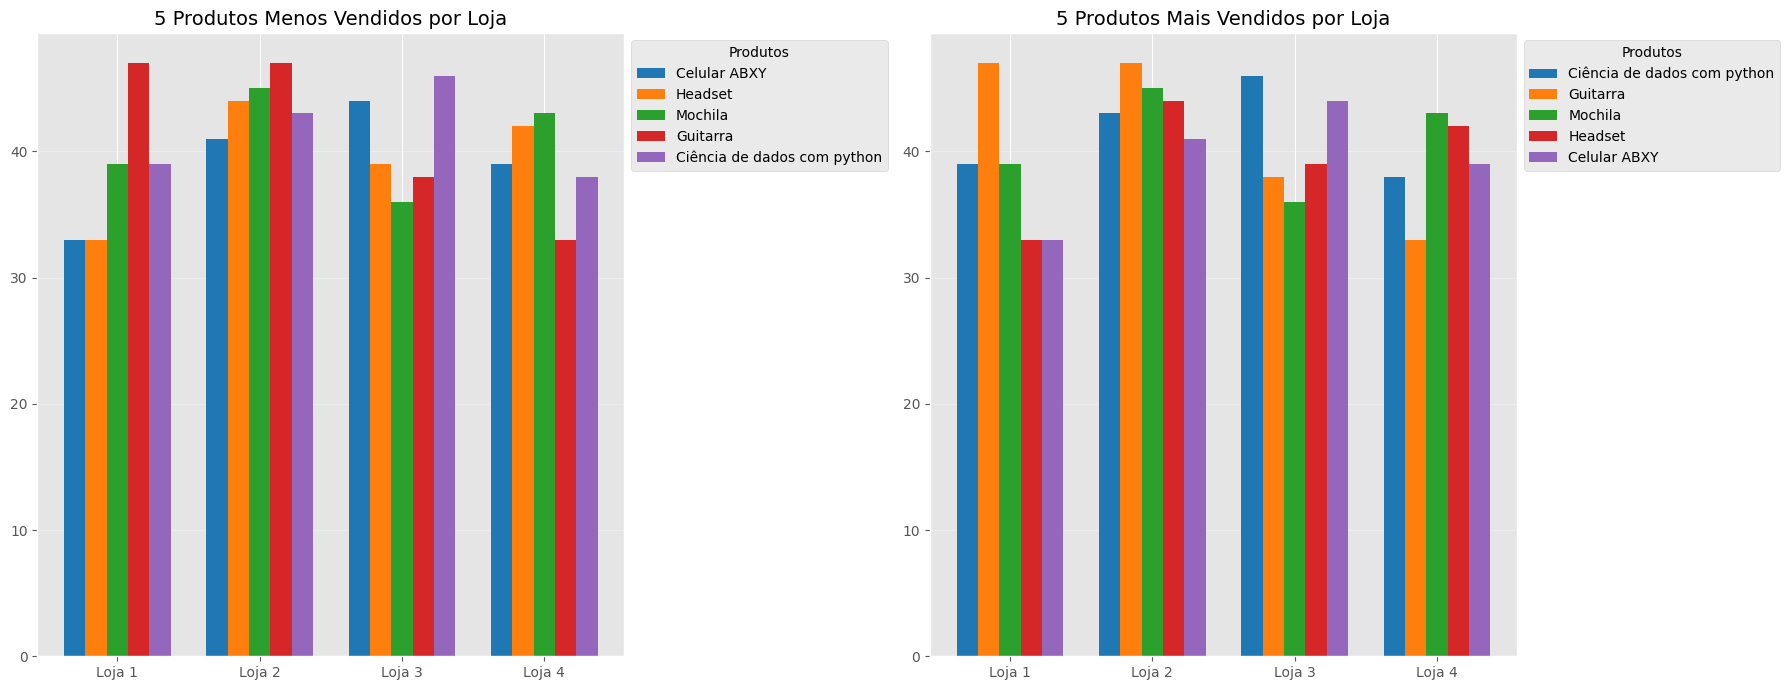

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Configuração de estilo
available_styles = plt.style.available
plt.style.use('ggplot' if 'ggplot' in available_styles else 'classic')

# 1. Análise dos produtos MENOS vendidos (como no seu código original)
top5_menos_vendidos = produto_geral.head(5).index.tolist()
resultados_menos = []

for produto in top5_menos_vendidos:
    vendas_por_loja = {}
    for nome_loja, df_loja in lojas.items():
        vendas = df_loja[df_loja['Produto'] == produto]
        quantidade = len(vendas)  # ou vendas['Quantidade'].sum() se tiver essa coluna
        vendas_por_loja[nome_loja] = quantidade

    loja_menos = min(vendas_por_loja, key=vendas_por_loja.get)
    resultados_menos.append({
        'Produto': produto,
        'Vendas por Loja': vendas_por_loja,
        'Loja que menos vendeu': loja_menos,
        'Quantidade mínima': vendas_por_loja[loja_menos]
    })

# 2. Análise dos produtos MAIS vendidos (novo)
top5_mais_vendidos = produto_geral.tail(5).index.tolist()[::-1]  # Invertendo para ficar em ordem decrescente
resultados_mais = []

for produto in top5_mais_vendidos:
    vendas_por_loja = {}
    for nome_loja, df_loja in lojas.items():
        vendas = df_loja[df_loja['Produto'] == produto]
        quantidade = len(vendas)
        vendas_por_loja[nome_loja] = quantidade

    loja_mais = max(vendas_por_loja, key=vendas_por_loja.get)
    resultados_mais.append({
        'Produto': produto,
        'Vendas por Loja': vendas_por_loja,
        'Loja que mais vendeu': loja_mais,
        'Quantidade máxima': vendas_por_loja[loja_mais]
    })

# 3. Relatório comparativo
print("═"*60)
print("ANÁLISE COMPARATIVA: PRODUTOS MAIS E MENOS VENDIDOS".center(60))
print("═"*60)

print("\nTOP 5 PRODUTOS MENOS VENDIDOS:")
for i, res in enumerate(resultados_menos, 1):
    print(f"\n{i}. {res['Produto']}")
    for loja, qtd in res['Vendas por Loja'].items():
        print(f"   {loja}: {qtd} unidades")
    print(f"   → Loja com menor desempenho: {res['Loja que menos vendeu']} ({res['Quantidade mínima']} unidades)")

print("\n" + "─"*60)

print("\nTOP 5 PRODUTOS MAIS VENDIDOS:")
for i, res in enumerate(resultados_mais, 1):
    print(f"\n{i}. {res['Produto']}")
    for loja, qtd in res['Vendas por Loja'].items():
        print(f"   {loja}: {qtd} unidades")
    print(f"   → Loja com melhor desempenho: {res['Loja que mais vendeu']} ({res['Quantidade máxima']} unidades)")

# 4. Gráficos comparativos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico dos menos vendidos
for i, res in enumerate(resultados_menos):
    vendas = list(res['Vendas por Loja'].values())
    ax1.bar([x + i*0.15 for x in range(len(lojas))], vendas,
            width=0.15, label=res['Produto'], color=plt.cm.tab10(i))

ax1.set_title('5 Produtos Menos Vendidos por Loja', fontsize=14)
ax1.set_xticks([x + 0.3 for x in range(len(lojas))])
ax1.set_xticklabels(lojas.keys())
ax1.legend(title="Produtos", bbox_to_anchor=(1, 1))
ax1.grid(axis='y', alpha=0.3)

# Gráfico dos mais vendidos
for i, res in enumerate(resultados_mais):
    vendas = list(res['Vendas por Loja'].values())
    ax2.bar([x + i*0.15 for x in range(len(lojas))], vendas,
            width=0.15, label=res['Produto'], color=plt.cm.tab10(i))

ax2.set_title('5 Produtos Mais Vendidos por Loja', fontsize=14)
ax2.set_xticks([x + 0.3 for x in range(len(lojas))])
ax2.set_xticklabels(lojas.keys())
ax2.legend(title="Produtos", bbox_to_anchor=(1, 1))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

A loja com baixo desempenho se mantém na 1 e 4.
Já a loja com melhor desempenho é a 2 e 3.

# 5. Frete Médio por Loja


Frete médio da loja 1: R$ 34.69
Frete médio da loja 2: R$ 33.62
Frete médio da loja 3: R$ 33.07
Frete médio da loja 4: R$ 31.28

Frete médio geral das 4 lojas: R$ 33.17


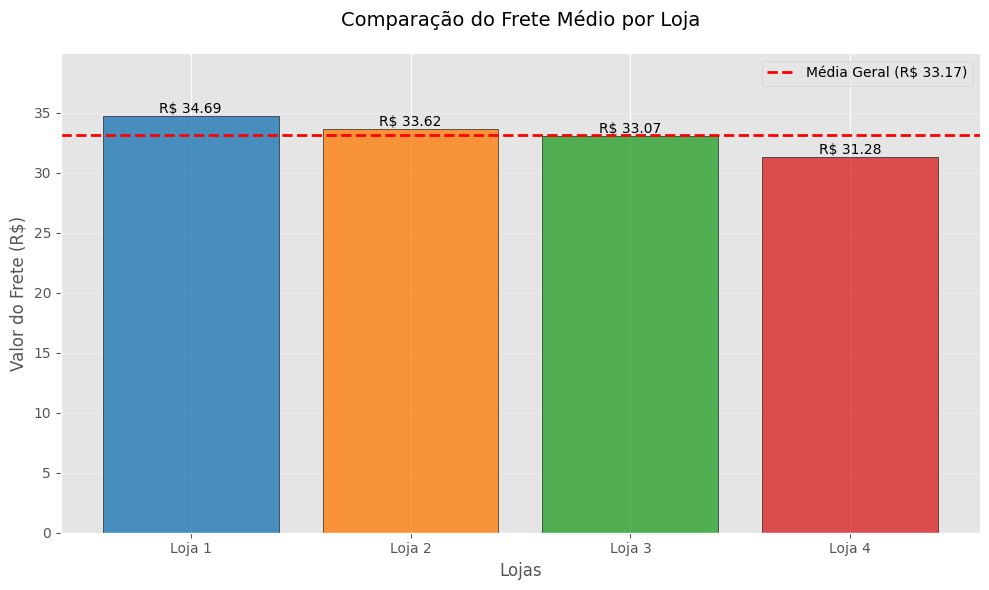

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Frete Médio por Loja

media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

print(f"Frete médio da loja 1: R$ {media_frete_loja1:.2f}")
print(f"Frete médio da loja 2: R$ {media_frete_loja2:.2f}")
print(f"Frete médio da loja 3: R$ {media_frete_loja3:.2f}")
print(f"Frete médio da loja 4: R$ {media_frete_loja4:.2f}")

media_frete_total = todas_lojas['Frete'].mean()
print(f"\nFrete médio geral das 4 lojas: R$ {media_frete_total:.2f}")

# Calcular a média geral
media_frete_total = np.mean([media_frete_loja1, media_frete_loja2,
                            media_frete_loja3, media_frete_loja4])

# 2. CONFIGURAÇÕES DO GRÁFICO
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# 3. DADOS PARA O GRÁFICO
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 4. CRIANDO O GRÁFICO
bars = plt.bar(lojas_nomes, medias, color=cores, edgecolor='black', alpha=0.8)

# Linha da média geral
plt.axhline(y=media_frete_total, color='red', linestyle='--', linewidth=2,
            label=f'Média Geral (R$ {media_frete_total:.2f})')

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {height:.2f}',
             ha='center', va='bottom')

# Configurações adicionais
plt.title('Comparação do Frete Médio por Loja', fontsize=14, pad=20)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Valor do Frete (R$)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(medias) * 1.15)

# Removendo bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

O custo médio do frete mais competitivo é o da loja 4 com R$ 31,28, o que atrai atenção de clientes referente a compra do produtos.

**Conclusão**

Análise das Lojas

Com base nos dados obtidos, a Loja 4 apresenta o menor desempenho em critérios estratégicos, como:

Faturamento

Destaque entre categorias

Volume de vendas

Avaliação dos clientes

Ponto positivo isolado:

Valor competitivo do frete (porém insuficiente para compensar as demais deficiências).

Recomendação:
Considerando o desempenho inferior em comparação às demais unidades, recomenda-se a venda da Loja 4.